# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-11 12:00:04.826377


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/10/20


,9/10/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6396100,191766,3.00
Brazil,4238446,129522,3.06
India,4562414,76271,1.67
Mexico,652364,69649,10.68
United Kingdom,360544,41697,11.57
Italy,283180,35587,12.57
France,392243,30819,7.86


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/10/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
40306,US,6327009,2020-09-08,189653.0,445.0,26387.0,36167.000000
40305,US,6300622,2020-09-07,189208.0,267.0,24257.0,38576.428571
40304,US,6276365,2020-09-06,188941.0,403.0,31395.0,39990.571429
40303,US,6244970,2020-09-05,188538.0,783.0,44452.0,40553.714286
40302,US,6200518,2020-09-04,187755.0,965.0,50502.0,40939.571429
40301,US,6150016,2020-09-03,186790.0,1070.0,36506.0,40318.714286
40300,US,6113510,2020-09-02,185720.0,1056.0,39670.0,41670.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/10/20


,9/10/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,441911,33019.0,7.47
New Jersey,195414,16014.0,8.19
California,750961,14077.0,1.87
Texas,669141,13930.0,2.08
Florida,654731,12326.0,1.88
Massachusetts,123546,9166.0,7.42
Illinois,257566,8461.0,3.28


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/10/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1395,California,744344,2020-09-08,13823.0,65.0,3379.0,4103.857143
1394,California,740965,2020-09-07,13758.0,27.0,2109.0,4070.000000
1393,California,738856,2020-09-06,13731.0,22.0,3542.0,4700.714286
1392,California,735314,2020-09-05,13709.0,71.0,4652.0,4753.714286
1391,California,730662,2020-09-04,13638.0,145.0,4644.0,4753.857143
1390,California,726018,2020-09-03,13493.0,176.0,4737.0,4885.285714
1389,California,721281,2020-09-02,13317.0,167.0,5664.0,4896.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/10/20


,9/10/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,251024,6128.0,2.44
Riverside,54868,1094.0,1.99
Orange,50471,1069.0,2.12
San Bernardino,50210,796.0,1.59
San Diego,41608,725.0,1.74
San Joaquin,18558,383.0,2.06
Sacramento,19669,346.0,1.76


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/10/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4424,Los Angeles,249241,2020-09-08,6036.0,6.0,420.0,960.000000
4423,Los Angeles,248821,2020-09-07,6030.0,25.0,487.0,1007.571429
4422,Los Angeles,248334,2020-09-06,6005.0,5.0,792.0,1083.571429
4421,Los Angeles,247542,2020-09-05,6000.0,23.0,1135.0,1112.285714
4420,Los Angeles,246407,2020-09-04,5977.0,45.0,1408.0,1135.571429
4419,Los Angeles,244999,2020-09-03,5932.0,54.0,1064.0,1144.714286
4418,Los Angeles,243935,2020-09-02,5878.0,49.0,1414.0,1221.285714
4417,Los Angeles,242521,2020-09-01,5829.0,45.0,753.0,1249.142857
4416,Los Angeles,241768,2020-08-31,5784.0,15.0,1019.0,1267.857143
4415,Los Angeles,240749,2020-08-30,5769.0,10.0,993.0,1293.428571



7 day new US cases as of 9/10/20


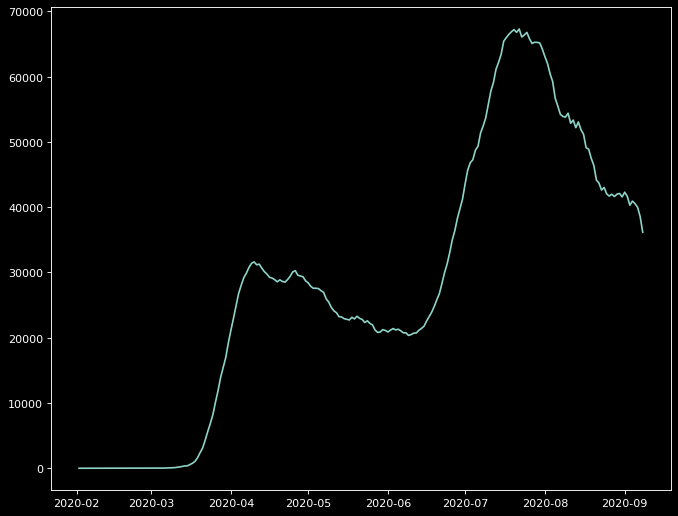

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/10/20


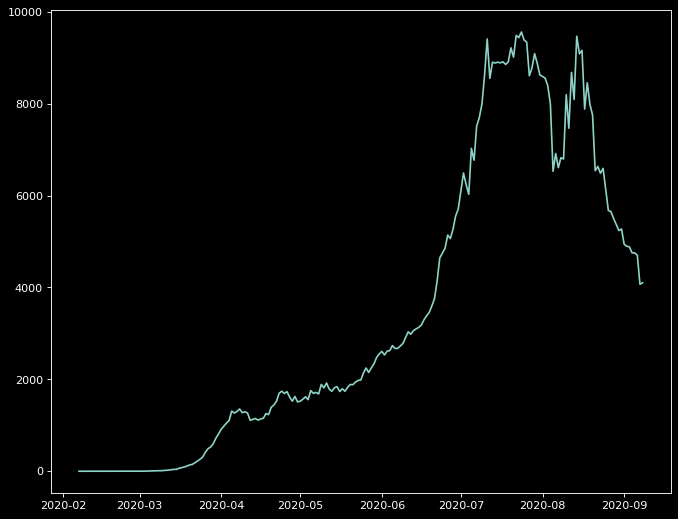

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/10/20


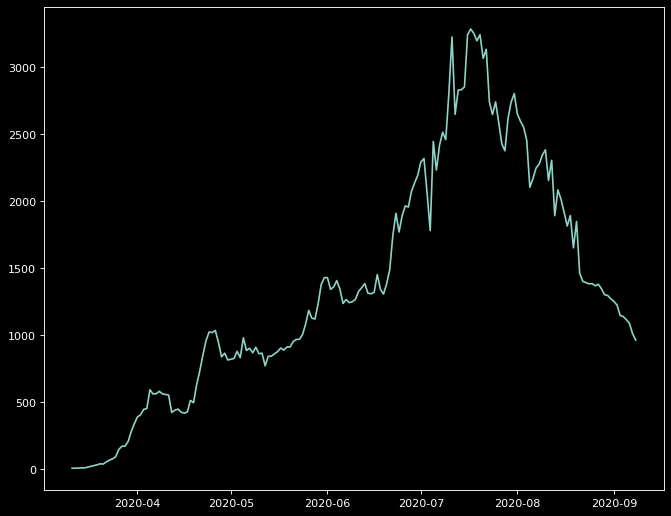

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()